In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
def trap(A, B, x0, t, step):
    rank = A.shape[0]
    x = np.linspace(0, t, step)
    h = t/step
    iinv = np.linalg.inv(np.eye(rank) - A*h/2)
    R = np.dot(iinv, np.eye(rank) + A*h/2)
    S = np.dot(iinv * h/2, B)
    y = np.zeros([step, x0.shape[0]], dtype=np.float64)
    y[0, :] = x0
    for i in range(1, step):
        y[i, :] = np.dot(R, y[i - 1]) + S
    return x, y

In [112]:
def rk(A, B, x0, t, step):
    rank = A.shape[0]
    x = np.linspace(0, t, step)
    h = t/step
    y = np.zeros([step, x0.shape[0]], dtype=np.float64)
    y[0, :] = x0
    for i in range(1, step):
        m1 = np.dot(A, y[i - 1]) + B
        m2 = np.dot(A, y[i - 1] + h/2*m1) + B
        m3 = np.dot(A, y[i - 1] + h/2*m2) + B
        m4 = np.dot(A, y[i - 1] + h*m3) + B
        y[i] = y[i - 1] + h/6*(m1 + 2*m2 + 2*m3 + m4)
    return x, y 

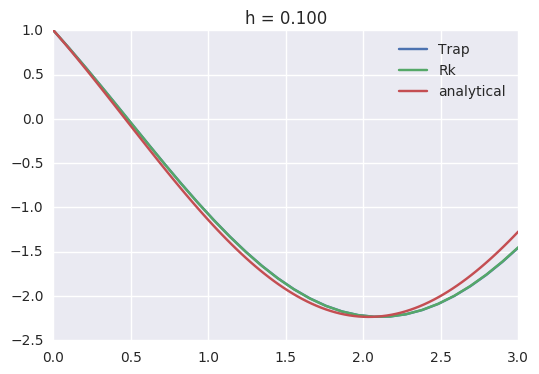

In [113]:
A = np.array([
    [0, 1],
    [-1, 0]
], dtype=np.float64)

B = np.zeros([2], dtype=np.float64)

x0 = np.array([1, -2])
t = 3
num_step = 30

x, y = trap(A, B, x0, t, num_step)
plt.plot(x, y[:, 0], label="Trap")
x, y = rk(A, B, x0, t, num_step)
plt.plot(x, y[:, 0], label="Rk")

ya = np.zeros([100, 2])
x = np.linspace(0, t, 100)
ya[:, 0] = x0[0] * np.cos(x) + x0[1] * np.sin(x)
ya[:, 1] = -x0[0] *np.sin(x) + x0[1]*np.cos(x)

plt.plot(x, ya[:, 0], label="analytical")
plt.legend()
plt.title("h = %.3f" % (t/num_step))

(10,) (10, 2)


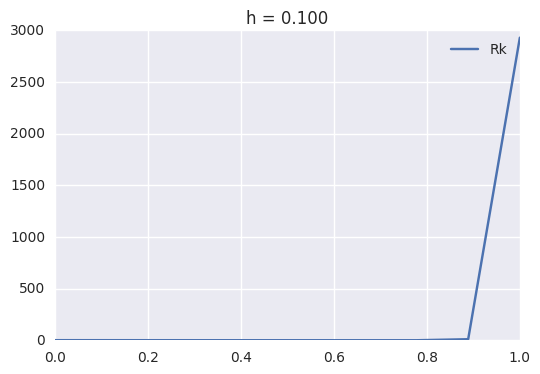

In [114]:
A = np.array([
    [0, 1],
    [-200, -102]
], dtype=np.float64)

B = np.zeros([2], dtype=np.float64)

x0 = np.array([1, -2])
t = 1
num_step = 10

x, y = rk(A, B, x0, t, num_step)
print(x.shape, y.shape)
plt.plot(x, y[:, 0], label="Rk")

plt.legend()
plt.title("h = %.3f" % (t/num_step))

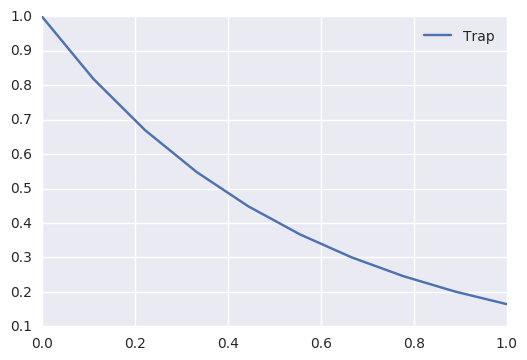

In [115]:
x, y = trap(A, B, x0, t, num_step)
plt.plot(x, y[:, 0], label="Trap")
plt.legend()

In [116]:
A, np.dot(A, [0,1])

(array([[   0.,    1.],
        [-200., -102.]]), array([   1., -102.]))

(30,) (30, 2)


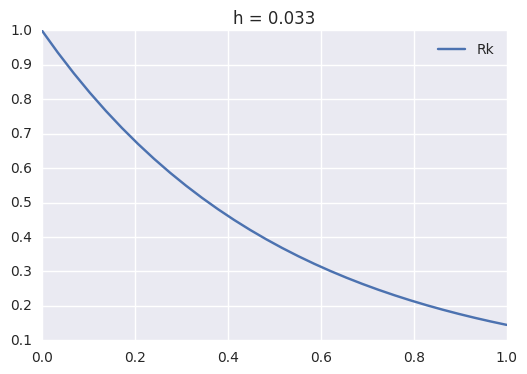

In [123]:
t = 1
num_step = 30  # tu se cini da lijepo konvergira

x, y = rk(A, B, x0, t, num_step)
print(x.shape, y.shape)
plt.plot(x, y[:, 0], label="Rk")

plt.legend()
plt.title("h = %.3f" % (t/num_step))